In [0]:
"""
In this notebook i create a trending dataset.
I will check if data is statonary with trending set
and then I detrend the set and check again.
I will use Adfuller test.

https://www.statsmodels.org/devel/generated/statsmodels.tsa.stattools.adfuller.html

"""
import numpy as np
import matplotlib.pyplot as plt

def plot_series(serie,label):
  plt.plot(serie)
  plt.ylabel(label)
  plt.show()


#Yt = α + βt + εt
def deterministic_trend(begin,variance,sample_size,drift,trend):
  items = []
  x = begin
  for i in range(sample_size):
    noise = (np.random.randint(variance * -10,variance * 10, size=1)/10)[0]
    x =  i * trend + noise + drift
    items.append(x)
  return np.array(items)    

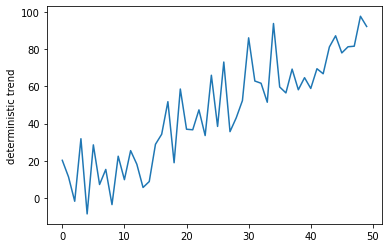

array([20.3, 11.4, -1.7, 31.9, -8.5, 28.6,  7.3, 15.4, -3.5, 22.5,  9.9,
       25.5, 18.2,  5.7,  8.9, 28.9, 34.3, 51.8, 19. , 58.6, 37. , 36.7,
       47.4, 33.6, 66. , 38.5, 73.1, 35.7, 43.1, 52.4, 86.1, 62.9, 61.7,
       51.5, 93.8, 59.7, 56.5, 69.3, 58.2, 64.7, 58.9, 69.5, 66.8, 81.2,
       87.2, 78. , 81.3, 81.6, 97.7, 92.2])

In [2]:
sample_size = 50
deterministic_trend_set = deterministic_trend(begin=4,variance=25,sample_size=sample_size,drift=2,trend =2)
plot_series(deterministic_trend_set,"deterministic trend")
deterministic_trend_set

In [0]:
X = [i for i in range(0, len(deterministic_trend_set))]
X = np.reshape(X, (len(deterministic_trend_set), 1))
y = deterministic_trend_set

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
print("coefficients",model.coef_)
print("intercept",model.intercept_)

coefficients [1.73360864]
intercept 3.662588235294116


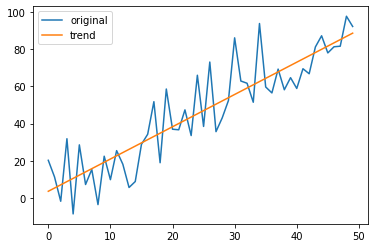

In [5]:
plt.plot(y,label="original")
plt.plot(trend,label="trend")
plt.legend()
plt.show()

mean 6.1106675275368615e-15
var 169.81237710444177


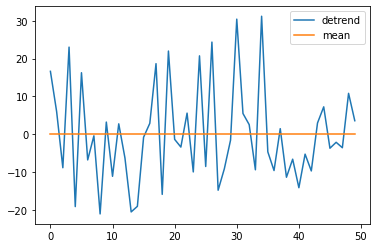

In [7]:
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(deterministic_trend_set))]
# plot detrended
mean = np.mean(detrended)
print("mean",np.mean(detrended))
print("var",np.var(detrended))
plt.plot(detrended,label="detrend")
plt.plot([mean for i in range(0, len(deterministic_trend_set))],label="mean")

plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
"""
The hypotheses for the test:

The null hypothesis for this test is that there is a unit root.
The  alternate is that the time series is stationary (or trend-stationary).

"""
def check_stationary(serie):
  print("mean",np.mean(serie))
  print("var",np.var(serie))
  result = adfuller(serie)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
check_stationary(X.reshape(X.shape[0]))
#X is original set, so not stationary p value so high,so we can NOT reject null hypothesis

mean 24.5
var 208.25
ADF Statistic: 0.000000
p-value: 0.958532


In [10]:
check_stationary(detrended)
#detrended has removed the trend effect , so  stationary p value so low,so we can  reject null hypothesis

mean 6.1106675275368615e-15
var 169.81237710444177
ADF Statistic: -9.050287
p-value: 0.000000


In [0]:
def detrend(trending_set):
  items = []
  for i in range(1,len(trending_set)):
    items.append( trending_set[i] - trending_set[i-1] )
  return items  



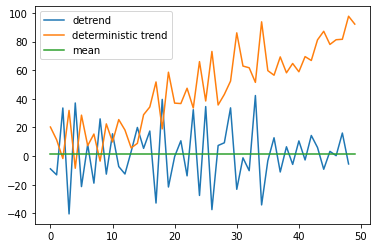

In [21]:
detrended2 = detrend(deterministic_trend_set)
plt.plot(detrended2,label="detrend")
plt.plot(deterministic_trend_set,label="deterministic trend")
mean = np.mean(detrended2)
plt.plot([mean for i in range(0, len(deterministic_trend_set))],label="mean")
plt.legend()
plt.show()

In [20]:
check_stationary(detrended2)


mean 1.46734693877551
var 428.65730112453144
ADF Statistic: -6.392988
p-value: 0.000000
